In [2]:
# Auto reload imported modules
%load_ext autoreload
%autoreload 2

In [3]:
# Use pomegranate to create a Hidden Markov Model
import torch
import numpy as np

In [15]:
X = np.array([[1,0,1],[1,0,1],[1,0,1],[1,0,1],[1,0,1]]).reshape(-1,3,1)
X[0]

array([[1],
       [0],
       [1]])

In [16]:
# Create Poisson distributions for each state
from pomegranate.distributions import Poisson, Categorical
from pomegranate.hmm import DenseHMM

d1 = Categorical([[0.2, 0.8]])
d2 = Categorical([[0.8, 0.2]])


X = np.array([[1,0,1],[1,0,1],[1,0,1],[1,0,1],[1,0,1]]).reshape(-1,3,1) # n_obs x seq_len x distribution_dim
# X = np.array([[1,0,1]]).reshape(-1,3,1) # n_obs x seq_len x distribution_dim


# Create the Hidden Markov Model object
model = DenseHMM()

print(model._initialized)
model.add_distributions([d1, d2])
print(model._initialized)

model.add_edge(d1, d2, 0.5)
model.add_edge(d1, d1, 0.5)
model.add_edge(d2, d1, 0.4)
model.add_edge(d2, d2, 0.6)
print(model._initialized)

False
False
False


In [31]:
m3.d

1

In [20]:
from pomegranate.hmm._base import _check_inputs as _check_inputs_base
_check_inputs_base(model, X, None, None)

print(model._initialized)

True


In [21]:
torch.exp(model.edges)

tensor([[0.5000, 0.5000],
        [0.4000, 0.6000]])

In [22]:
torch.exp(model.starts)

tensor([0.5000, 0.5000])

In [33]:
from dynamicHMM import DynamicHMM
from pomegranate.distributions import Categorical
import numpy as np
import torch


T = np.array(
				[[[0.5, 0.5],
				 [0.4, 0.6]],
				[[0.3, 0.7],
				 [0.6, 0.4]]]
			)

# T = np.array(
# 				[[[0.5, 0.5],
# 				 [0.4, 0.6]],
# 				[[0.5, 0.5],
# 				 [0.4, 0.6]]]
# 			)

m3 = DynamicHMM(3, distributions=[d1,d2], edges=T)
m3._emission_matrix(X).shape

Somehow calling initialize


torch.Size([5, 3, 2])

In [30]:
X.shape

(5, 3, 1)

In [215]:
# Can we learn the parameters of the HMM?
# Initialize a random model
Xsample = m3.sample(10000).numpy().astype(int)
m_random = DynamicHMM(3, distributions=[Categorical([[0.6, 0.4]]), Categorical([[0.5, 0.5]])], tol=1e-3, max_iter=500)
m_random.verbose = True
m_random.fit(Xsample)

# d1 = Categorical([[0.2, 0.8]])
# d2 = Categorical([[0.8, 0.2]])

[x.probs for x in m_random.distributions]

[1] Improvement: 60.83203125, Time: 0.02394s
[2] Improvement: 0.390625, Time: 0.03312s
[3] Improvement: 0.388671875, Time: 0.03131s
[4] Improvement: 0.384765625, Time: 0.02661s
[5] Improvement: 0.384765625, Time: 0.02379s
[6] Improvement: 0.3828125, Time: 0.03899s
[7] Improvement: 0.3828125, Time: 0.02178s
[8] Improvement: 0.392578125, Time: 0.02029s
[9] Improvement: 0.396484375, Time: 0.02812s
[10] Improvement: 0.396484375, Time: 0.03588s
[11] Improvement: 0.40625, Time: 0.02638s
[12] Improvement: 0.412109375, Time: 0.03506s
[13] Improvement: 0.41796875, Time: 0.03488s
[14] Improvement: 0.4296875, Time: 0.04794s
[15] Improvement: 0.4375, Time: 0.03995s
[16] Improvement: 0.4453125, Time: 0.02441s
[17] Improvement: 0.453125, Time: 0.03333s
[18] Improvement: 0.46484375, Time: 0.03454s
[19] Improvement: 0.470703125, Time: 0.02617s
[20] Improvement: 0.48046875, Time: 0.03107s
[21] Improvement: 0.484375, Time: 0.03462s
[22] Improvement: 0.49609375, Time: 0.0289s
[23] Improvement: 0.5, Time:

[Parameter containing:
 tensor([[0.7454, 0.2546]]),
 Parameter containing:
 tensor([[0.2942, 0.7058]])]

In [216]:
# T = np.array(
# 				[[[0.5, 0.5],
# 				 [0.4, 0.6]],
# 				[[0.3, 0.7],
# 				 [0.6, 0.4]]]
# 			)

torch.exp(m_random.edges)

tensor([[[0.6253, 0.3747],
         [0.4744, 0.5256]],

        [[0.2688, 0.7312],
         [0.7818, 0.2182]]])

In [180]:
m_random.inertia

tensor(0.)

<AxesSubplot:>

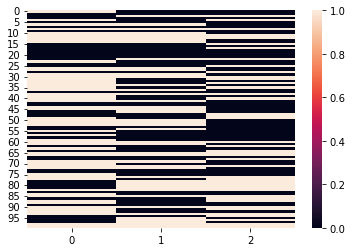

In [172]:
import seaborn as sns
sns.heatmap(Xsample.squeeze())

In [167]:
Xsample.squeeze()

array([[0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 1],
       [1, 1, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 1],
       [1, 1, 1],
       [0, 1, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       [1, 0, 0],
       [1, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 1, 1],
       [1, 0, 0],
       [1, 1, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 1],
       [1, 0, 1],
       [0,